# Project - Data Mining

### Basic python packages loaded

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

## Problem 1: Clustering


A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Dataset: bank_marketing_part1_Data.csv

#### Data Dictionary for Market Segmentation:

1.	spending: Amount spent by the customer per month (in 1000s)
2.	advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.	probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.	current_balance: Balance amount left in the account to make purchases (in 1000s)
5.	credit_limit: Limit of the amount in credit card (10000s)
6.	min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.	max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)



### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [2]:
df_bank=pd.read_csv("bank_marketing_part1_Data.csv")

### Inspect the data

In [3]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Exploratory Data Analysis

In [4]:
# Checks the number of rows and columns
row, col = df_bank.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 210 rows and 7 columns in the dataset


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


### Data Pre-processing

In [6]:
# Checks if any value in the dataframe is null.
a = df_bank.isnull().values.sum()
print("There are {}" .format(a), "null values present  in the dataset")

There are 0 null values present  in the dataset


In [7]:
df_bank.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
# Check for duplicate data
dups = df_bank.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_bank[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [9]:
#Multilying the values of dataset by its multiples.
df_bank['spending'] = 1000* df_bank['spending']
df_bank['current_balance'] = 1000* df_bank['current_balance']
df_bank['max_spent_in_single_shopping'] = 1000* df_bank['max_spent_in_single_shopping']
df_bank['credit_limit'] = 10000* df_bank['credit_limit']
df_bank['advance_payments'] = 100* df_bank['advance_payments']
df_bank['min_payment_amt'] = 100* df_bank['min_payment_amt']

In [10]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [11]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.523810,2909.699431,10590.0000,12270.0000,14355.00000,17305.000000,21180.0000
advance_payments,210.0,1455.928571,130.595873,1241.0000,1345.0000,1432.00000,1571.500000,1725.0000
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.8569,0.87345,0.887775,0.9183
current_balance,210.0,5628.533333,443.063478,4899.0000,5262.2500,5523.50000,5979.750000,6675.0000
credit_limit,210.0,32586.047619,3777.144449,26300.0000,29440.0000,32370.00000,35617.500000,40330.0000
min_payment_amt,210.0,370.020095,150.355713,76.5100,256.1500,359.90000,476.875000,845.6000
max_spent_in_single_shopping,210.0,5408.071429,491.480499,4519.0000,5045.0000,5223.00000,5877.000000,6550.0000


### 1.2  Do you think scaling is necessary for clustering in this case? Justify

#### Clustering on the non-normalised data fails. Clustering on the normalised data works very well.
k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so we should  normalize the data if there are likely to be scaling problems.

In [13]:
#X = StandardScaler()
#scaled_df = X.fit_transform(df_bank)

min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df_bank)
print(scaled_df)

[[0.8829084  0.93181818 0.60889292 ... 0.80755524 0.32335617 1.        ]
 [0.50991501 0.51239669 0.89201452 ... 0.67854597 0.33427817 0.30773018]
 [0.78942398 0.8285124  0.67876588 ... 0.80185317 0.33843893 0.80206795]
 ...
 [0.32483475 0.36157025 0.64882033 ... 0.40698503 0.12376965 0.23732152]
 [0.52219075 0.53512397 0.83393829 ... 0.60940841 0.19567281 0.4549483 ]
 [0.47025496 0.5661157  0.40471869 ... 0.42836778 0.24378161 0.66962088]]


#### Now that we have scaled the data. Let us create a dataframe out of this scaled variables for clustering.

In [14]:
scaled_df = pd.DataFrame(scaled_df, index=df_bank.index, columns=df_bank.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.608893,1.000000,0.807555,0.323356,1.000000
1,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730
2,0.789424,0.828512,0.678766,0.759572,0.801853,0.338439,0.802068
3,0.022663,0.113636,0.016334,0.213401,0.007840,0.574302,0.327917
4,0.698772,0.712810,0.826679,0.557995,0.758375,0.169408,0.648941


### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

### Creating the Dendrogram

In [15]:
#Importing dendrogram and linkage module
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
#Choosing ward linkage method
HClust = linkage(scaled_df, method = 'ward')

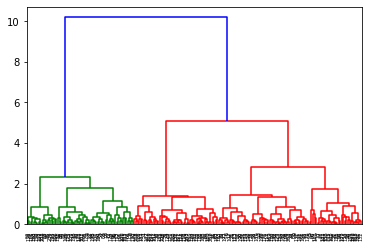

In [17]:
dend = dendrogram(HClust)

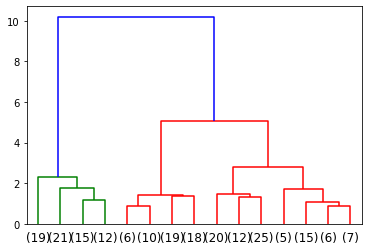

In [18]:
#Plot the truncated dendrogram with the last 15 clusters.
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 15,# we are looking at the last 15 merges
                 )

In [19]:
#Choosing average linkage method
HClust_1 = linkage(scaled_df, method = 'average')

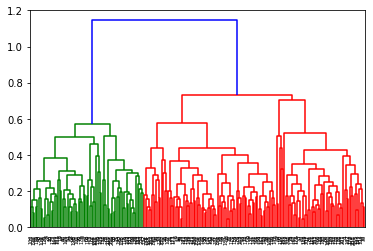

In [20]:
dend = dendrogram(HClust_1)

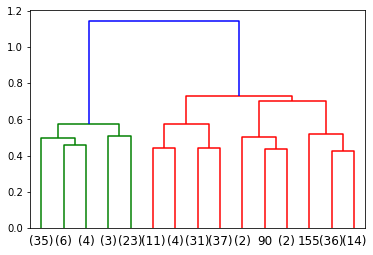

In [26]:
#Plot the truncated dendrogram with the last 15 clusters.
dend = dendrogram(HClust_1,
                 truncate_mode='lastp',
                 p = 15,# we are looking at the last 15 merges
                 )

#### Inference:

- 2 clusters really do not make much business impact as it is kind of implicit.Cutoff 1 (at 4 of Y axis) looks to be more suitable for this type of data, since the vertical line that pass through the very first cutoff are of highest length. 
- If these 3 clusters shown in 2 red and 1 green if combined into one then it is because of agglomerative property.

In [27]:
from scipy.cluster.hierarchy import fcluster

In [28]:
#Method 1 Maxclust

Hclust_Maxclust = fcluster(HClust, 3, criterion='maxclust')
Hclust_Maxclust

array([1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [29]:
# Method 2 Distance

Hclust_Dist = fcluster(HClust, 5, criterion='distance')
Hclust_Dist

array([1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

##### Now, let us go ahead and check whether the number of clusters generated by the 'maxclust' criterion is same as the number of clusters generated by the 'distance' criterion.

In [30]:
np.array_equal(Hclust_Maxclust,Hclust_Dist)

True

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [31]:
from sklearn.cluster import KMeans 

In [32]:
#Within Sum of Squares (WSS) for 2 to 15 clusters.

wss =[] 
k=range(1,15)
for i in k:
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [33]:
# Within Cluster Sum of Squares
wss

[88.98592483911847,
 34.81326792694563,
 22.024363075666038,
 18.663597169604223,
 16.181514000349726,
 14.481037313739515,
 13.122986129535079,
 12.054702230439979,
 11.25683943222028,
 10.4309881116795,
 9.890588361429318,
 9.384297511145768,
 8.772244367346175,
 8.21899316205809]

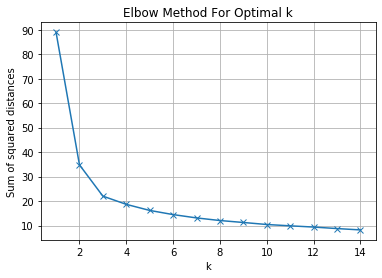

In [36]:
#Plot the Within Sum of Squares (WSS) plot using the values of 'inertia' computed

plt.plot(k, wss,'x-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

#### We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3 .

#### Forming 2 Clusters with K=2

In [37]:
## Create K Means cluster and store the result in the object k_means with k=2
k_means2 = KMeans(n_clusters = 2)

# Fit K means on the scaled_df
k_means2.fit(scaled_df)
labels_2 = k_means2.labels_

#### Forming 3 Clusters with K=3

In [38]:
#Create K Means cluster and store the result in the object k_means with k=3
k_means3 = KMeans(n_clusters = 3)

# Fit K means on the scaled_df
k_means3.fit(scaled_df)
labels_3 = k_means3.labels_

#### Forming 4 Clusters with K=4

In [39]:
#Create K Means cluster and store the result in the object k_means with k=4
k_means4 = KMeans(n_clusters = 4)

# Fit K means on the scaled_df
k_means4.fit(scaled_df)
labels_4 = k_means4.labels_

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

#Let us check the silhouette score and silhouette width for 2 clusters.
silhouette_score(scaled_df,labels_2)

0.505113885588951

In [41]:
silhouette_samples(scaled_df,labels_2).min()

0.0010602166293162964

In [42]:
#Let us check the silhouette score and silhouette width for 3 clusters.
silhouette_score(scaled_df,labels_3)

0.42210525681247935

In [43]:
silhouette_samples(scaled_df,labels_3).min()

0.004601020857671658

In [44]:
#Let us check the silhouette score and silhouette width for 4 clusters
silhouette_score(scaled_df,labels_4)

0.3384677913768806

In [45]:
silhouette_samples(scaled_df,labels_4).min()

-0.0007194610746273024

#### Inference:

- WSS reduces as K keeps increasing
- Silhouette score: The average of sil-width for each observation of a dataset is called as silhouette score.
- Silhouette score for 2 Cluster is 0.5 which is more close to +1 than for 3 and 4 cluster(0.42 & 0.33) respectively.
- But selection 2 clusters does not give us any insights so we can say that the 3 Clusters are well separated from each other on an average.
- From 1 and 2 cluster shown in the (WSS) plot, there is a significant drop. Similarly there is a significant drop between 2 and 3. Hence, 3 is a valuable addition in K-means algorithm. 

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

### Hierarchical clustering 

In [46]:
df_bank['H_clusters'] = Hclust_Maxclust

In [47]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,3
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [48]:
#Cluster Frequency
df_bank.H_clusters.value_counts().sort_index()

1    67
2    53
3    90
Name: H_clusters, dtype: int64

In [49]:
#Export the dataframe thus created with the clusters into a csv file.
df_bank.to_csv('H_Cluster.csv')

In [50]:
#Cluster Profiles
aggdata=df_bank.iloc[:,0:8].groupby('H_clusters').mean()
aggdata['Freq']=df_bank.H_clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_clusters,,,,,,,,
1,18452.537313,1618.477612,0.884042,6173.567164,36920.597015,369.617910,6037.223881,67
2,14903.018868,1457.113208,0.881602,5595.660377,33147.547170,248.075660,5206.698113,53
3,12131.111111,1334.222222,0.855044,5242.144444,29028.555556,442.131222,5058.288889,90


#### Observations:
- Cluster 1: Customers that are big spender and pays large amount advances.
- Cluster 2: Customers that are High spenders with lowest minimum payment and has low credit limit.
- Cluster 3: Customers that are smallest spenders with highest minimum payment and lowest credit limit.

#### Recommendations:
- The goal was to segment the customers of a bank in order to give promotional offers.

- Cluster 1:These customers are Big Spender and gives large payments in advance. Customers with high average card spend and high average balance are typically those customers who are economically stable and have high spending capacity. So, can promote various expensive brand new credit card product to these customers to increase their credit limit and so that they spend more.They are 67 customers.

- Cluster 2:These customers are High average Spenders and has Low Credit Limit i.e. low average balance. Economically they may not be stable but have high potential of purchasing/spending because of various reasons. So, can offer a loan to increase their spending. Offering loan to these customers won't make much difference as they have high balance anyway.They are 53 customers.

- Cluster 3:These customers are Smallest Spenders and has lowest credit limit., but minimum paid by the customer while making payments for purchases made monthly are highest than customers in cluster 1 & 2. So, can promote various monthly shopping schemes as well as loans to these customers to increase their monthly shopping. They are 90 customers.


### K-Means clustering (k=3)

#### Here, we will be going with 3 clusters from the K-Means Clustering as well. This is not based on the Silhouette Score and Silhouette width since 2 cluster has the highest Silhouette Score. We can probably go ahead and try to read into the significance of the clusters.

In [51]:
df_bank['Kmeans_clusters'] = labels_3

In [52]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Kmeans_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1,0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2,1
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1,0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,3,2
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1,0


In [53]:
#Export the new dataframe with both the cluster labels of Hierarchical Clustering and K-Means clustering into a csv.
df_bank.to_csv('Kmeans_cluster.csv')

#### Cluster Profiling for K-means cluster

In [54]:
df_bank.Kmeans_clusters.value_counts().sort_index()

0    64
1    69
2    77
Name: Kmeans_clusters, dtype: int64

In [55]:
clust_profile=df_bank.drop(['H_clusters'],axis=1)

In [56]:
clust_profile=clust_profile.groupby('Kmeans_clusters').mean()
clust_profile['freq']=df_bank.Kmeans_clusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Kmeans_clusters,,,,,,,,
0,18610.156250,1625.171875,0.884600,6195.546875,37096.093750,359.209375,6056.656250,64
1,14651.159420,1444.202899,0.882067,5546.681159,32873.043478,279.685797,5165.637681,69
2,11896.103896,1325.766234,0.849775,5230.597403,28580.259740,459.954545,5086.233766,77


#### Observations:

- Cluster 0: Customers that are big spender and pays large amount advances.
- Cluster 1: Customers that are High spenders with lowest minimum payment and has low credit limit.
- Cluster 2: Customers that are smallest spenders with highest minimum payment and lowest credit limit.

#### Recommendations:

- The goal was to segment the customers of a bank in order to give promotional offers.

- Cluster 0:These customers are Big Spender and gives large payments in advance. Customers with high average card spend and high average balance are typically those customers who are economically stable and have high spending capacity. So, can promote various  expensive brand new credit card product to these customers to increase their credit limit and so that they spend more.They are 64 customers.

- Cluster 1:These customers are High average Spenders and has Low Credit Limit i.e. low average balance. Economically they may not be stable but have high potential of purchasing/spending because of various reasons. So, can offer a loan to increase their spending. Offering loan to these customers won't make much difference as they have high balance anyway.They are 69 customers.

- Cluster 2:These customers are Small Spenders and has lowest credit limit., but minimum paid by the customer while making payments for purchases made monthly are highest than customers in cluster 1 & 2. So, can promote various monthly shopping schemes as well as loans to these customers to increase their monthly shopping. They are 77 customers.


## Problem 2: CART-RF-ANN


An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Dataset: insurance_part2_data-1.csv

#### Attribute Information:

1.	Target: Claim Status (Claimed)
2.	Code of tour firm (Agency_Code)
3.	Type of tour insurance firms (Type)
4.	Distribution channel of tour insurance agencies (Channel)
5.	Name of the tour insurance products (Product)
6.	Duration of the tour (Duration)
7.	Destination of the tour (Destination)
8.	Amount of sales of tour insurance policies (Sales)
9.	The commission received for tour insurance firm (Commission)
10.	 Age of insured (Age)


### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [297]:
df_insur=pd.read_csv("insurance_part2_data-1.csv")

### Inspect the data:

In [298]:
df_insur.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Exploratory Data Analysis

#### Claimed is the target variable while all others are the predictors.

In [299]:
# Checks the number of rows and columns
row, col = df_insur.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 3000 rows and 10 columns in the dataset


In [300]:
df_insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Out of the 10 columns, 6 are object type, 2 are int and while remaining 2 are float type  .

### Summary of the data:

In [301]:
df_insur.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
# Geting unique counts of all Nominal Variables

for column in df_insur[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df_insur[column].nunique())
    print(df_insur[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




#### Observation:
- There are no ? or other charecter present.
- All nominal values have 2 to 5 categories which can be included in dataset for prediction.

### Data Pre-processing:

In [303]:
# Checks if any value in the dataframe is null.
b = df_insur.isnull().values.sum()
print("There are {}" .format(b), "null values present in the dataset")

There are 0 null values present in the dataset


In [304]:
# Checks for duplicate data
dups1 = df_insur.duplicated()
print('Number of duplicate rows = %d' % (dups1.sum()))
df_insur[dups1]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


#### These duplicates may have different packages as it may happen that the agency is selling Travel Packages to similar customers in similar price tag. That way there could be duplicate in the record level, however, they are not true duplicates. Hence we won't drop it. 

### Univariate analysis:

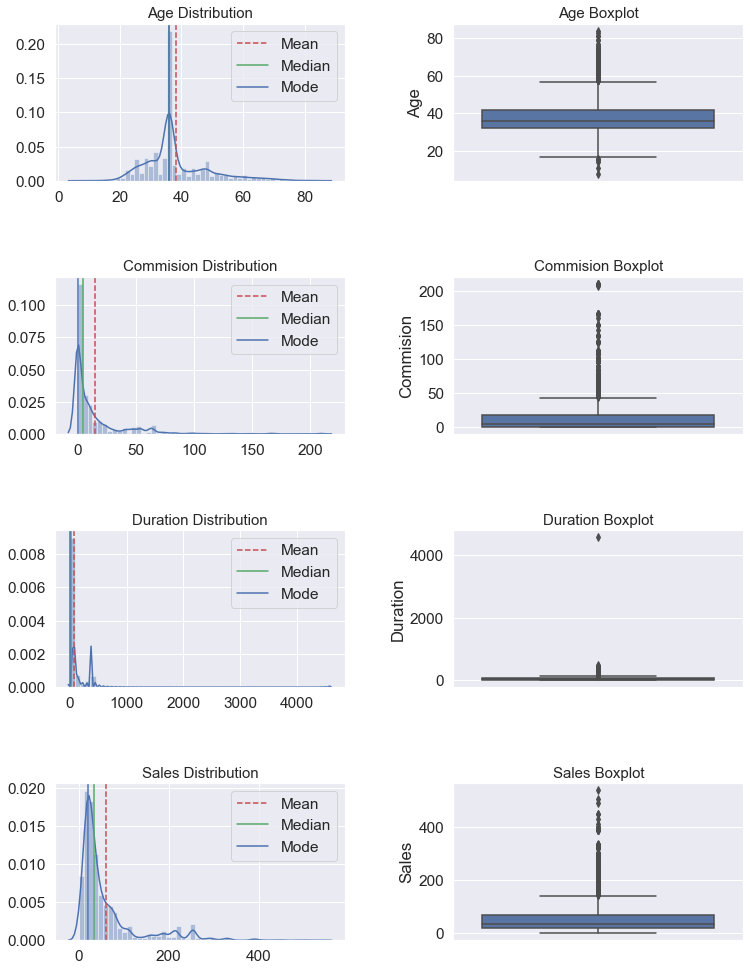

In [305]:
## Univariate analysis for first 4 columns

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=df_insur['Age'].mean()
median=df_insur['Age'].median()
mode=df_insur['Age'].mode().array[0]

a = sns.distplot(df_insur['Age'] , axlabel=False, ax=axes[0][0])
a.set_title("Age Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(df_insur['Age'], orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=15)

mean1=df_insur['Commision'].mean()
median1=df_insur['Commision'].median()
mode1=df_insur['Commision'].mode().array[0]

a = sns.distplot(df_insur['Commision'] , axlabel=False, ax=axes[1][0])
a.set_title("Commision Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(df_insur['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("Commision Boxplot",fontsize=15)

mean2=df_insur['Duration'].mean()
median2=df_insur['Duration'].median()
mode2=df_insur['Duration'].mode().array[0]

a = sns.distplot(df_insur['Duration'] , axlabel=False, ax=axes[2][0])
a.set_title("Duration Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(df_insur['Duration'] , orient = "v" , ax=axes[2][1])
a.set_title("Duration Boxplot",fontsize=15)

mean3=df_insur['Sales'].mean()
median3=df_insur['Sales'].median()
mode3=df_insur['Sales'].mode().array[0]

a = sns.distplot(df_insur['Sales'] , axlabel=False, ax=axes[3][0])
a.set_title("Sales Distribution",fontsize=15)
axes[3][0].axvline(mean3, color='r', linestyle='--')
axes[3][0].axvline(median3, color='g', linestyle='-')
axes[3][0].axvline(mode3, color='b', linestyle='-')
axes[3][0].legend({'Mean':mean3,'Median':median3,'Mode':mode3})

a = sns.boxplot(df_insur['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Sales Boxplot",fontsize=15)

plt.show()

In [306]:
from scipy.stats import skew 
df_insur.skew()   # to measure the skeweness of every attribute

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

#### Observations:
- For all the above variables mean is greater than median, hence it is positively skewed.
- "Sales", "Commision" and "Duration" all 3 variables are positively Skewed with too many outliers
- "Age" variable is little right skewed with too many outliers

-- There are outliers in all the variables. CART and Random Forest are robust to outliers. Neural Networks can handle outliers if there are more hidden layers and if the number of outliers is lesser. For now, we are treating the outliers using IQR.

In [307]:
# Outlier treatment :  define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

#### All the oulier are replaced by the low and high value of IQR which is nothing but one type of outlier treatment.

In [308]:
lAge,uAge=remove_outlier(df_insur['Age'])
df_insur['Age']=np.where(df_insur['Age']>uAge,uAge,df_insur['Age'])
df_insur['Age']=np.where(df_insur['Age']<lAge,lAge,df_insur['Age'])

lCommision,uCommision=remove_outlier(df_insur['Commision'])
df_insur['Commision']=np.where(df_insur['Commision']>uCommision,uCommision,df_insur['Commision'])
df_insur['Commision']=np.where(df_insur['Commision']<lCommision,lCommision,df_insur['Commision'])

lDuration,uDuration=remove_outlier(df_insur['Duration'])
df_insur['Duration']=np.where(df_insur['Duration']>uDuration,uDuration,df_insur['Duration'])
df_insur['Duration']=np.where(df_insur['Duration']<lDuration,lDuration,df_insur['Duration'])

lSales,uSales=remove_outlier(df_insur['Sales'])
df_insur['Sales']=np.where(df_insur['Sales']>uSales,uSales,df_insur['Sales'])
df_insur['Sales']=np.where(df_insur['Sales']<lSales,lSales,df_insur['Sales'])


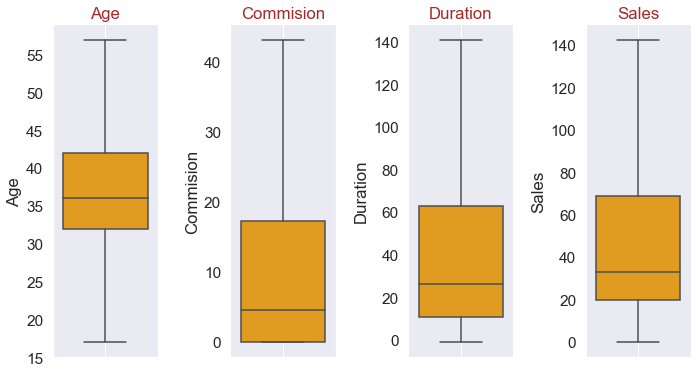

In [309]:
continuous=df_insur.dtypes[(df_insur.dtypes=='int64')|(df_insur.dtypes=='float64')].index
data_plot=df_insur[continuous]    
fig=plt.figure(figsize=(10,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]],color='Orange')
    ax.set_title(data_plot.columns[i],color='Brown')
    plt.grid()
plt.tight_layout()

In [310]:
df_insur.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,37.5733,9.09657,17,32,36,42,57
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,11.1572,15.0259,0,0,4.63,17.235,43.0875
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,45.1757,45.4507,-1,11,26.5,63,141
Sales,3000,NaN,NaN,NaN,49.8105,42.2148,0,20,33,69,142.5
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bi-Variate Analysis

### Checking pairwise distribution of the continuous variables

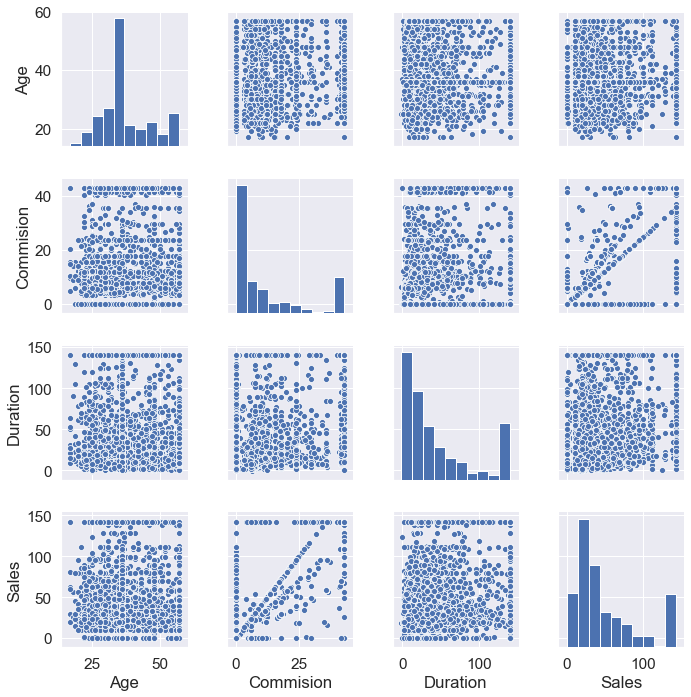

In [311]:
sns.pairplot(df_insur[['Age','Commision','Duration', 'Sales']])
plt.show()

#### There are no correlations between the features.

### Checking for Correlations

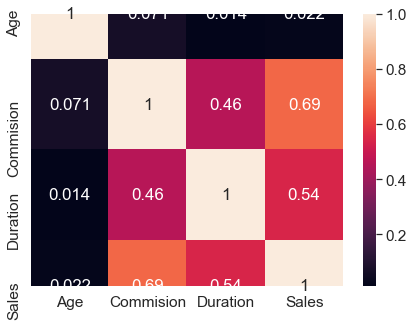

In [312]:
# construct heatmap with only continuous variables
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_insur[['Age','Commision','Duration', 'Sales']].corr(), annot=True)

#### There are mostly positive correlations between variables. Overall the magnitude of correlations between the variables are very less.

In [313]:
# Displays the data type of the dataset
df_insur.dtypes

Age             float64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration        float64
Sales           float64
Product Name     object
Destination      object
dtype: object

#### 6 columns are of type object i.e. strings. These need to be converted to ordinal type

In [314]:
#Converting Object data type into Categorical
for feature in df_insur.columns: 
    if df_insur[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_insur[feature].unique()))
        print(pd.Categorical(df_insur[feature].unique()).codes)
        df_insur[feature] = pd.Categorical(df_insur[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [315]:
#Checking teh dataset after converting Object data type into Categorical
df_insur.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [316]:
df_insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [317]:
df_insur.dtypes.value_counts()

int8       6
float64    4
dtype: int64

### Proportion of observations in Target classes

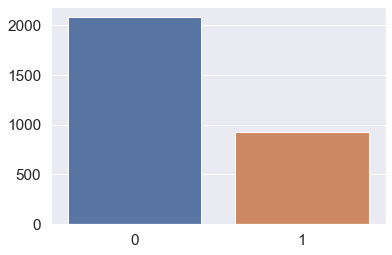

0    0.692
1    0.308
Name: Claimed, dtype: float64


In [318]:
# Get the proportions (Claimed is the Target Class)

sns.barplot(df_insur.Claimed.value_counts().index,df_insur.Claimed.value_counts().values)
plt.show()
print(df_insur.Claimed.value_counts(normalize=True))

#### Claimed  proportion is less as compared to unclaimed

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [319]:
#Extract x and y (Extracting the target column into separate vectors for training set and test set)
x = df_insur.drop(['Claimed'], axis=1)
y = df_insur['Claimed']

### Splitting the data into Train and Test set

- Training Dataset: The sample of data used to fit the model.
- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [320]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=0)

### Checking the dimensions of the training and test data

In [321]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (2100, 9)
x_test (900, 9)
y_train (2100,)
y_test (900,)


In [322]:
#Proportion of values in target's train & test sets
print('y_train','\n', y_train.value_counts(normalize=True))
print('y_test','\n', y_test.value_counts(normalize=True))

y_train 
 0    0.697143
1    0.302857
Name: Claimed, dtype: float64
y_test 
 0    0.68
1    0.32
Name: Claimed, dtype: float64


#### Observations are almost equally distributed between the train and test sets w.r.t target classes

### Feature Scaling

In [323]:
#Initialize an object for StandardScaler
sc=StandardScaler()

In [324]:
#Scale the training data
x_train=sc.fit_transform(x_train)

# Apply the transformation on the test data
x_test=sc.transform(x_test)

### Decision Tree Classifier

A decision tree is built on an entire dataset, using all the features/variables of interest.

#### Building a Decision Tree Classifier Model and fit it on the Training Set

### Default Decision Tree Classifier model

In [325]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [326]:
print (pd.DataFrame(dtc.feature_importances_, columns = ["Imp"], index = x.columns).sort_values('Imp',ascending=False))


                   Imp
Duration      0.254236
Sales         0.223650
Agency_Code   0.184451
Age           0.182367
Commision     0.077909
Product Name  0.051373
Destination   0.020003
Channel       0.005716
Type          0.000297


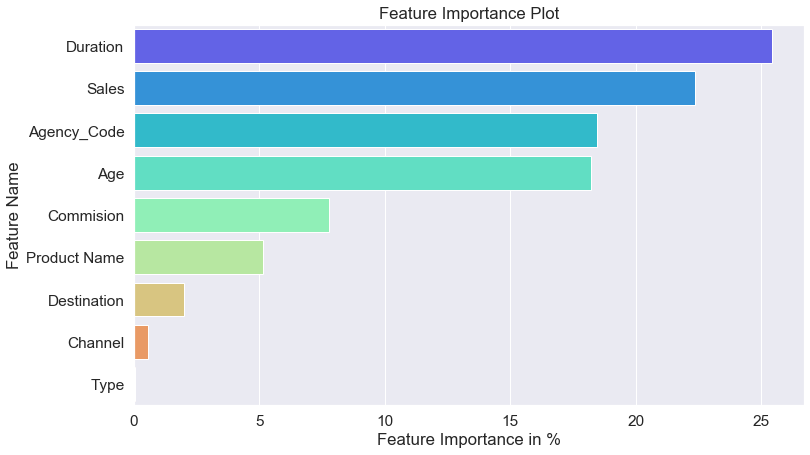

In [327]:
x=pd.DataFrame(dtc.feature_importances_*100,index=x.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Observation:
- Duration, Sales, Agency Code and Age are the most important features of Default CART Model

### GridSearchCV Decision Tree Classifier model

In [328]:

param_grid = {
    'criterion': ['gini'],
    'max_depth': [5], #5,20,30,50
    'min_samples_leaf': [10], #5,10,20,30,50,100,150
    'min_samples_split': [300], #150,200,300,350,450,500
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [329]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
dtc1 = grid_search.best_estimator_
dtc1
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}
#{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 300}
#{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 300}
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 300}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 300}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Generating Tree

In [330]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dtc1, out_file=Credit_Tree_File, feature_names = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination'], class_names = list(train_char_label))

Credit_Tree_File.close()

#### http://webgraphviz.com/

### Feature Importance of DT Model 

In [331]:
print (pd.DataFrame(dtc1.feature_importances_, columns = ["Imp"], index = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination']).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.615865
Sales         0.268488
Product Name  0.087369
Duration      0.017858
Commision     0.010420
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


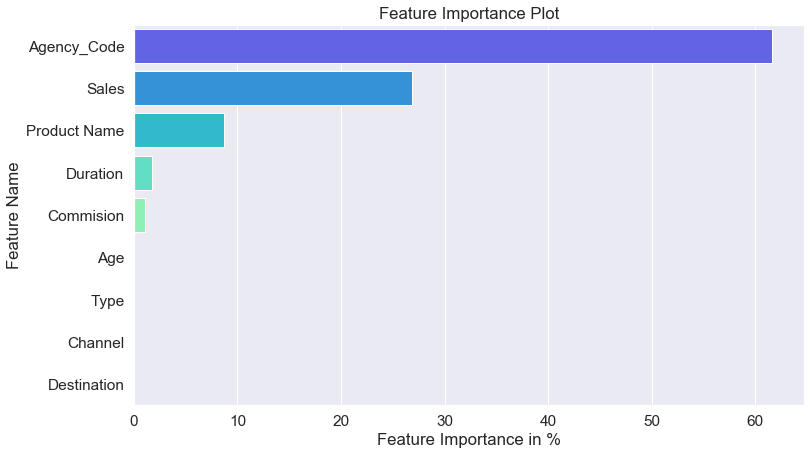

In [332]:
x=pd.DataFrame(dtc1.feature_importances_*100,index=['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination']).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Observation:
- Agency Code, Sales and Product Name are the most important features of CART Model
- Age, Type, Channel and Destination are of no use.

### Random Forest Classifier

Random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results.
It is an ensemble of Decision Trees whereby the final/leaf node will be either the majority class for classification problems or the average for regression problems.
A random forest will grow many Classification trees and for each output from that tree, we say the tree ‘votes’ for that class. A tree is grown using the following steps:
1. A random sample of rows from the training data will be taken for each tree.
2. From the sample taken in Step (1), a subset of features will be taken to be used for splitting on each tree.
3. Each tree is grown to the largest extent specified by the parameters until it reaches a vote for  the class.

#### Building a Random Forest Classifier Model and fit it on the Training Set

### Default Random Forest Classifier model

In [333]:
rfc=RandomForestClassifier(random_state=0,n_estimators=100, min_samples_split=3)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [334]:
print (pd.DataFrame(rfc.feature_importances_, columns = ["Imp"], index = ['Age', 'Agency_Code', 'Type','Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination']).sort_values('Imp',ascending=False))

                   Imp
Duration      0.238014
Sales         0.200981
Age           0.178792
Commision     0.121732
Agency_Code   0.117890
Product Name  0.094095
Destination   0.023703
Type          0.018915
Channel       0.005879


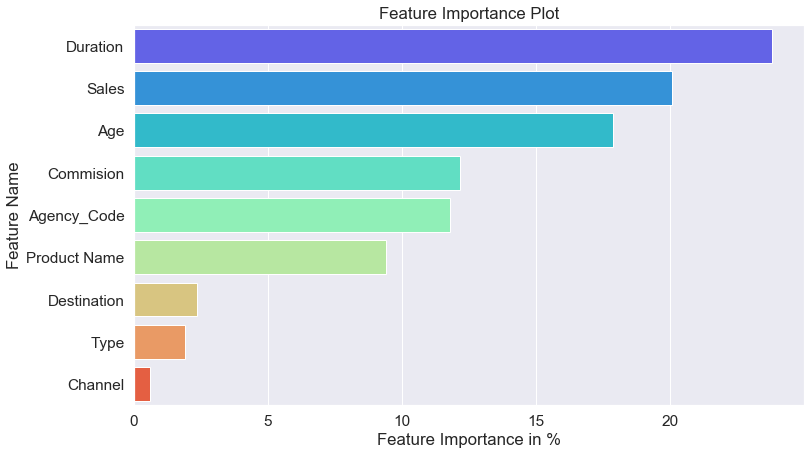

In [335]:

x=pd.DataFrame(rfc.feature_importances_*100,index=['Age', 'Agency_Code', 'Type','Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination']).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Observation:
- Duration, Sales, Age and Commision are the most important features of Default RF Model

### GridSearchCV Random Forest Classifier model

In [336]:
param_grid = {
    'max_depth': [30],#10,20,40
    'max_features': [5],#2,3,5,7
    'min_samples_leaf': [20], #10,30
    'min_samples_split': [70],#40,50,60,80
    'n_estimators': [500] #450,600
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [337]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
rfc1 = grid_search.best_estimator_
rfc1

#{'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 450}
#{'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 500}
#{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 60, 'n_estimators': 500}
#{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 70, 'n_estimators': 450}

{'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 20, 'min_samples_split': 70, 'n_estimators': 500}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Feature Importance of RF Model

In [338]:
print (pd.DataFrame(rfc1.feature_importances_, columns = ["Imp"], index = ['Age', 'Agency_Code', 'Type','Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination']).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.316341
Product Name  0.244887
Sales         0.189827
Commision     0.099599
Duration      0.068322
Age           0.039380
Type          0.031093
Destination   0.010029
Channel       0.000521


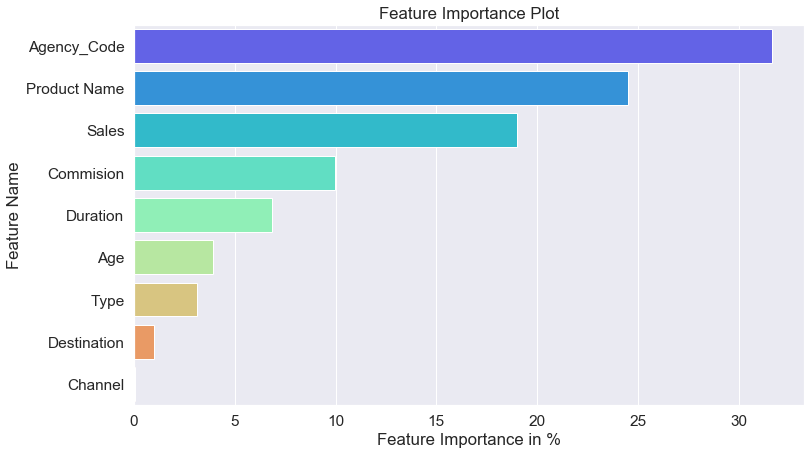

In [339]:

x=pd.DataFrame(rfc1.feature_importances_*100,index=['Age', 'Agency_Code', 'Type','Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination']).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Observation:
- Agency Code, Product Name and Sales are the most important features of RF Model

### MLP Classifier (Artificial Neural Network)

Artificial Neural Networks are organized in layers made up of interconnected nodes which contain an activation function that computes the output of the network. Each incoming data point receives a weight and is multiplied and added. A bias is added if the weighted sum equates to zero and then passed to the activation function.

#### Building an ANN Model and fit it on the Training Set

### Default Artificial Neural Network model

In [340]:
mlp=MLPClassifier(hidden_layer_sizes=(500), solver='sgd', random_state=0, max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=500, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### GridSearchCV Artificial Neural Network model

In [341]:
param_grid = {
    'hidden_layer_sizes': [400], #,50,100,200,300,500
    'max_iter': [1000], #2500,5000,7000
    'solver': ['adam'], #sgd,adam
    'tol': [0.01], 
}

mlp1 = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp1, param_grid = param_grid, cv = 10)

In [342]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
mlp1 = grid_search.best_estimator_
mlp1

{'hidden_layer_sizes': 400, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=400, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

### Decision Tree Classifier for default Model

In [343]:
#prediction_dtc=dtc.predict(x_train)
train_prediction_dtc = dtc.predict(x_train)
test_prediction_dtc = dtc.predict(x_test)

In [344]:
#Getting the Predicted Classes and Probs
test_prediction_dtc
test_prediction_dtc_prob=dtc.predict_proba(x_test)
test_prediction_dtc_prob
pd.DataFrame(test_prediction_dtc_prob).head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [345]:
#Check the Metrics for Predictions on dtc Training set

#CART Train Data Accuracy
Dcart_train_acc=accuracy_score(y_train,train_prediction_dtc)
print('Accuracy for CART default Train model is','\n',Dcart_train_acc)

Accuracy for CART default Train model is 
 0.9823809523809524


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1464
           1       0.97      0.97      0.97       636

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



Confusion Matrix for DecisionTreeClassifier model is


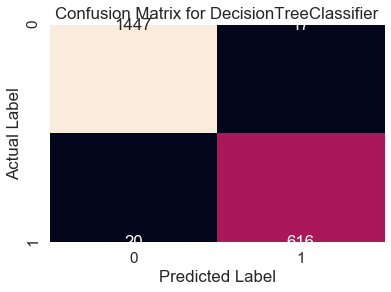

In [346]:
models_names={dtc:'DecisionTreeClassifier'}

Dcart_metrics=classification_report(y_train,train_prediction_dtc)
print('Classification report for {} model is'.format(models_names[dtc]),'\n',Dcart_metrics)
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,train_prediction_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [347]:
Dcart_metrics=classification_report(y_train,train_prediction_dtc,output_dict=True)
df=pd.DataFrame(Dcart_metrics).transpose()
Dcart_train_precision=round(df.loc["1"][0],2)
Dcart_train_recall=round(df.loc["1"][1],2)
Dcart_train_f1=round(df.loc["1"][2],2)
print ('Dcart_train_precision ',Dcart_train_precision)
print ('Dcart_train_recall ',Dcart_train_recall)
print ('Dcart_train_f1 ',Dcart_train_f1)

Dcart_train_precision  0.97
Dcart_train_recall  0.97
Dcart_train_f1  0.97


### Decision Tree Classifier for GridsearchCV Model

#### Predictions on dtc training and test dataset

In [348]:
#prediction_dtc=dtc.predict(x_train)

train_prediction_dtc1 = dtc1.predict(x_train)
test_prediction_dtc1 = dtc1.predict(x_test)

#### Getting the Predicted Classes and Probs

In [349]:
test_prediction_dtc1
test_prediction_dtc1_prob=dtc1.predict_proba(x_test)
test_prediction_dtc1_prob
pd.DataFrame(test_prediction_dtc1_prob).head()

,0,1
0,0.859649,0.140351
1,0.240175,0.759825
2,0.932836,0.067164
3,0.469880,0.530120
4,0.755000,0.245000


#### Check the Metrics for Predictions on dtc Training set

[Accuracy Score, Classification Report, Confusion Matrix]

In [350]:
#CART Train Data Accuracy
cart_train_acc=accuracy_score(y_train,train_prediction_dtc1)
print('Accuracy for CART GridSearchCV Train model is','\n',cart_train_acc)

Accuracy for CART GridSearchCV Train model is 
 0.7823809523809524


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1464
           1       0.65      0.62      0.63       636

    accuracy                           0.78      2100
   macro avg       0.74      0.74      0.74      2100
weighted avg       0.78      0.78      0.78      2100



Confusion Matrix for DecisionTreeClassifier model is


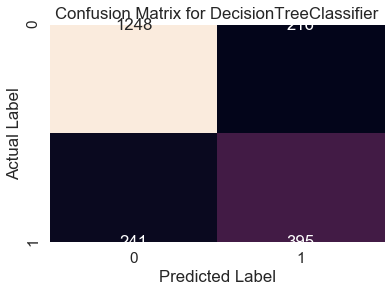

In [351]:
models_names={dtc1:'DecisionTreeClassifier'}

cart_metrics=classification_report(y_train,train_prediction_dtc1)
print('Classification report for {} model is'.format(models_names[dtc1]),'\n',cart_metrics)
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc1]))
sns.heatmap(confusion_matrix(y_train,train_prediction_dtc1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc1]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [352]:
cart_metrics=classification_report(y_train,train_prediction_dtc1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.62
cart_train_f1  0.63


### Random Forest Classifier for Default Model

In [353]:
#prediction_rfc=rfc.predict(x_train)
train_prediction_rfc = rfc.predict(x_train)
test_prediction_rfc = rfc.predict(x_test)

In [354]:
#Getting the Predicted Classes and Probs
test_prediction_rfc
test_prediction_rfc_prob=rfc.predict_proba(x_test)
test_prediction_rfc_prob
pd.DataFrame(test_prediction_rfc_prob).head()

,0,1
0,0.969500,0.030500
1,0.283333,0.716667
2,0.972667,0.027333
3,0.395667,0.604333
4,0.516905,0.483095


In [355]:
#Check the Metrics for Predictions on rfc Training set

#RF Train Data Accuracy
Drf_train_acc=accuracy_score(y_train,train_prediction_rfc)
print('Accuracy for RF default Train model is','\n',Drf_train_acc)

Accuracy for RF default Train model is 
 0.9733333333333334


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1464
           1       0.96      0.95      0.96       636

    accuracy                           0.97      2100
   macro avg       0.97      0.97      0.97      2100
weighted avg       0.97      0.97      0.97      2100



Confusion Matrix for RandomForestClassifier model is


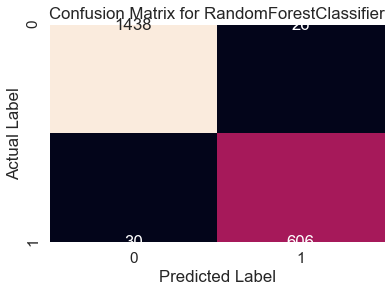

In [356]:
models_names={rfc:'RandomForestClassifier'}

Drf_metrics=classification_report(y_train,train_prediction_rfc)
print('Classification report for {} model is'.format(models_names[rfc]),'\n',Drf_metrics)
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(y_train,train_prediction_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [357]:
Drf_metrics=classification_report(y_train,train_prediction_rfc,output_dict=True)
df=pd.DataFrame(Drf_metrics).transpose()
Drf_train_precision=round(df.loc["1"][0],2)
Drf_train_recall=round(df.loc["1"][1],2)
Drf_train_f1=round(df.loc["1"][2],2)
print ('Drf_train_precision ',Drf_train_precision)
print ('Drf_train_recall ',Drf_train_recall)
print ('Drf_train_f1 ',Drf_train_f1)

Drf_train_precision  0.96
Drf_train_recall  0.95
Drf_train_f1  0.96


### Random Forest Classifier for GridsearchCV Model 

#### Predictions on rfc training and test dataset

In [358]:
#prediction_rfc=rfc.predict(x_train)

train_prediction_rfc1 = rfc1.predict(x_train)
test_prediction_rfc1 = rfc1.predict(x_test)

#### Getting the Predicted Classes and Probs

In [359]:
test_prediction_rfc1
test_prediction_rfc1_prob=rfc1.predict_proba(x_test)
test_prediction_rfc1_prob
pd.DataFrame(test_prediction_rfc1_prob).head()

,0,1
0,0.919450,0.080550
1,0.275905,0.724095
2,0.946276,0.053724
3,0.496423,0.503577
4,0.770785,0.229215


#### Check the Metrics for Predictions on rfc Training set

[Accuracy Score, Classification Report, Confusion Matrix]

In [360]:
#RF Train Data Accuracy
rf_train_acc=accuracy_score(y_train,train_prediction_rfc1)
print('Accuracy for RF Train model is','\n',rf_train_acc)

Accuracy for RF Train model is 
 0.7971428571428572


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1464
           1       0.70      0.58      0.64       636

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



Confusion Matrix for RandomForestClassifier model is


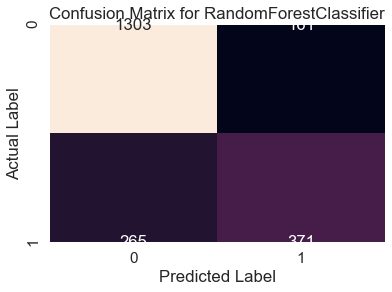

In [361]:
models_names={rfc1:'RandomForestClassifier'}

rf_metrics=classification_report(y_train,train_prediction_rfc1)
print('Classification report for {} model is'.format(models_names[rfc1]),'\n',rf_metrics)
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc1]))
sns.heatmap(confusion_matrix(y_train,train_prediction_rfc1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc1]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [362]:
rf_metrics=classification_report(y_train,train_prediction_rfc1,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.7
rf_train_recall  0.58
rf_train_f1  0.64


### MLP Classifier (Artificial Neural Network) for Default Model

In [363]:
#prediction_ann=mlp.predict(x_train)
train_prediction_mlp = mlp.predict(x_train)
test_prediction_mlp = mlp.predict(x_test)

In [364]:
#Getting the Predicted Classes and Probs
test_prediction_mlp
test_prediction_mlp_prob=mlp.predict_proba(x_test)
test_prediction_mlp_prob
pd.DataFrame(test_prediction_mlp_prob).head()

,0,1
0,0.899593,0.100407
1,0.283410,0.716590
2,0.890750,0.109250
3,0.544896,0.455104
4,0.747059,0.252941


In [365]:
#Check the Metrics for Predictions on mlp Training set
#ANN Train Data Accuracy
Dnn_train_acc=accuracy_score(y_train,train_prediction_mlp)
print('Accuracy for ANN default Train model is ','\n',Dnn_train_acc)

Accuracy for ANN default Train model is  
 0.7723809523809524


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1464
           1       0.68      0.47      0.55       636

    accuracy                           0.77      2100
   macro avg       0.74      0.69      0.70      2100
weighted avg       0.76      0.77      0.76      2100



Confusion Matrix for ANN model is


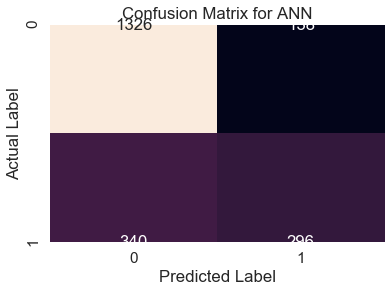

In [366]:
models_names={mlp:'ANN'}

Dnn_metrics=classification_report(y_train,train_prediction_mlp)
print('Classification report for {} model is'.format(models_names[mlp]),'\n',Dnn_metrics)
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_train,train_prediction_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [367]:
Dnn_metrics=classification_report(y_train,train_prediction_mlp,output_dict=True)
df=pd.DataFrame(Dnn_metrics).transpose()
Dnn_train_precision=round(df.loc["1"][0],2)
Dnn_train_recall=round(df.loc["1"][1],2)
Dnn_train_f1=round(df.loc["1"][2],2)
print ('Dnn_train_precision ',Dnn_train_precision)
print ('Dnn_train_recall ',Dnn_train_recall)
print ('Dnn_train_f1 ',Dnn_train_f1)

Dnn_train_precision  0.68
Dnn_train_recall  0.47
Dnn_train_f1  0.55


### MLP Classifier (Artificial Neural Network) for GridSearchCV Model

#### Predictions on mlp training and test dataset

In [368]:
#prediction_ann=mlp.predict(x_train)

train_prediction_mlp1 = mlp1.predict(x_train)
test_prediction_mlp1 = mlp1.predict(x_test)

#### Getting the Predicted Classes and Probs

In [369]:
test_prediction_mlp1
test_prediction_mlp1_prob=mlp1.predict_proba(x_test)
test_prediction_mlp1_prob
pd.DataFrame(test_prediction_mlp1_prob).head()

,0,1
0,0.907809,0.092191
1,0.234242,0.765758
2,0.915977,0.084023
3,0.510697,0.489303
4,0.777595,0.222405


#### Check the Metrics for Predictions on mlp Training set

[Accuracy Score, Classification Report, Confusion Matrix]

In [370]:
#ANN Train Data Accuracy
nn_train_acc=accuracy_score(y_train,train_prediction_mlp1)
print('Accuracy for ANN Train model is ','\n',nn_train_acc)


Accuracy for ANN Train model is  
 0.7766666666666666


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1464
           1       0.67      0.51      0.58       636

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



Confusion Matrix for ANN model is


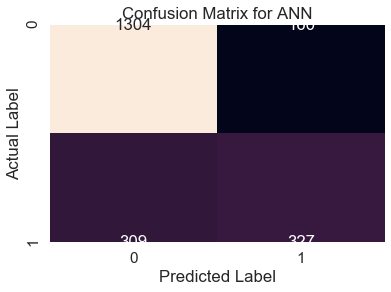

In [371]:
models_names={mlp1:'ANN'}

nn_metrics=classification_report(y_train,train_prediction_mlp1)
print('Classification report for {} model is'.format(models_names[mlp1]),'\n',nn_metrics)
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp1]))
sns.heatmap(confusion_matrix(y_train,train_prediction_mlp1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp1]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [372]:
nn_metrics=classification_report(y_train,train_prediction_mlp1,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.51
nn_train_f1  0.58


### Compare ROC curves and Calculate Area under the curve for all Default models for the training data

AUC for Decision Tree Classification Train Model is 0.9990484414200776
AUC for Random Forest Classification Train Model is 0.9941886191016257
AUC for Artificial Neural Network Train Model is 0.8003058734577447


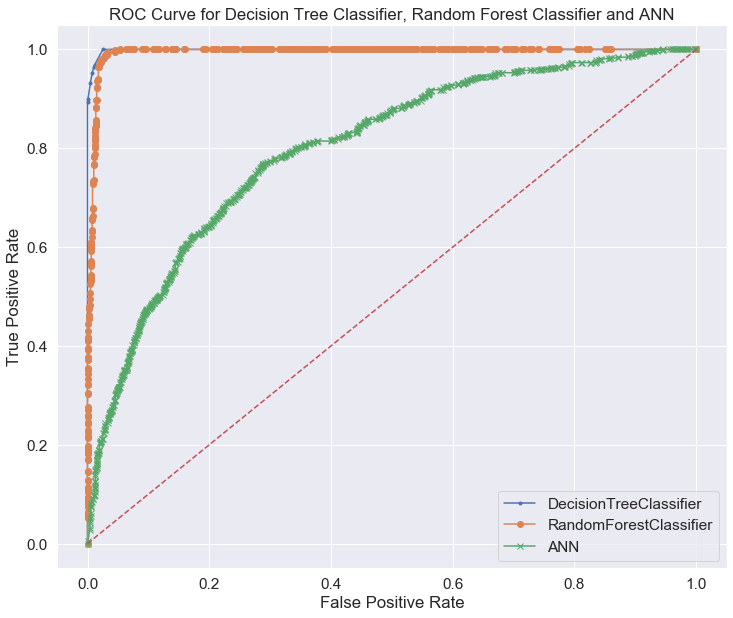

In [373]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

Dcart_train_auc=roc_auc_score(y_train,dtc.predict_proba(x_train)[:,1])
print('AUC for Decision Tree Classification Train Model is',Dcart_train_auc)
Drf_train_auc=roc_auc_score(y_train,rfc.predict_proba(x_train)[:,1])
print('AUC for Random Forest Classification Train Model is',Drf_train_auc)
Dnn_train_auc=roc_auc_score(y_train,mlp.predict_proba(x_train)[:,1])
print('AUC for Artificial Neural Network Train Model is',Dnn_train_auc)

plt.figure(figsize=(12,10))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_train, dtc.predict_proba(x_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_train, rfc.predict_proba(x_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_train, mlp.predict_proba(x_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Decision Tree Classifier, Random Forest Classifier and ANN'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

### Compare ROC curves and Calculate Area under the curve for all GridSearchCV models for the training data

AUC for Decision Tree Classification Train Model is 0.8159201335189195
AUC for Random Forest Classification Train Model is 0.8459393365295392
AUC for Artificial Neural Network Train Model is 0.815356823727532


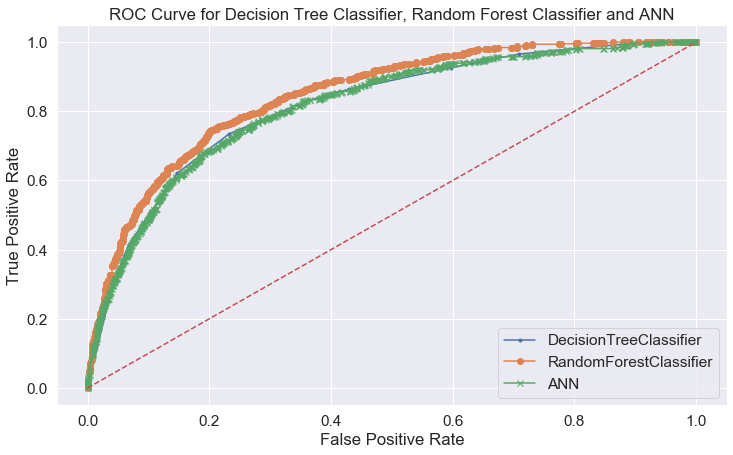

In [374]:
models_names={dtc1:'DecisionTreeClassifier',rfc1:'RandomForestClassifier',mlp1:'ANN'}

cart_train_auc=roc_auc_score(y_train,dtc1.predict_proba(x_train)[:,1])
print('AUC for Decision Tree Classification Train Model is',cart_train_auc)
rf_train_auc=roc_auc_score(y_train,rfc1.predict_proba(x_train)[:,1])
print('AUC for Random Forest Classification Train Model is',rf_train_auc)
nn_train_auc=roc_auc_score(y_train,mlp1.predict_proba(x_train)[:,1])
print('AUC for Artificial Neural Network Train Model is',nn_train_auc)

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_train, dtc1.predict_proba(x_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_train, rfc1.predict_proba(x_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_train, mlp1.predict_proba(x_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Decision Tree Classifier, Random Forest Classifier and ANN'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

### Model Evaluation

### Comparing Default Models on The test set

In [375]:
models=[dtc,rfc,mlp]
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

Accuracy for DT Test model is 
 0.6922222222222222
Accuracy for RF Test model is 
 0.7555555555555555
Accuracy for ANN Test model is  
 0.7811111111111111
Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       612
           1       0.52      0.49      0.50       288

    accuracy                           0.69       900
   macro avg       0.64      0.64      0.64       900
weighted avg       0.69      0.69      0.69       900



Confusion Matrix for DecisionTreeClassifier model is 
 [[482 130]
 [147 141]]


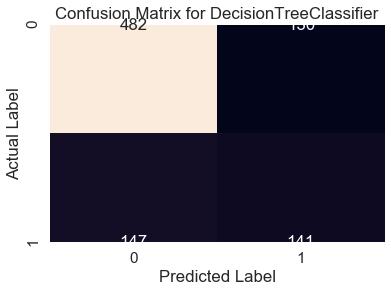

Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       612
           1       0.65      0.50      0.57       288

    accuracy                           0.76       900
   macro avg       0.72      0.69      0.70       900
weighted avg       0.75      0.76      0.75       900



Confusion Matrix for RandomForestClassifier model is 
 [[535  77]
 [143 145]]


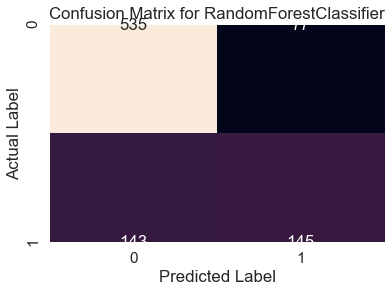

Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       612
           1       0.78      0.44      0.56       288

    accuracy                           0.78       900
   macro avg       0.78      0.69      0.71       900
weighted avg       0.78      0.78      0.76       900



Confusion Matrix for ANN model is 
 [[576  36]
 [161 127]]


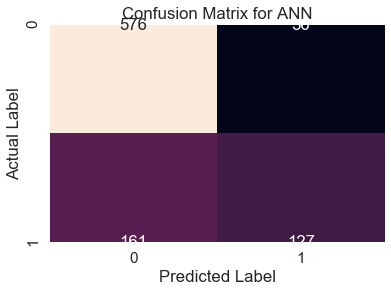

In [376]:
#CART Test Data Accuracy
Dcart_test_acc=accuracy_score(y_test,test_prediction_dtc)
print('Accuracy for DT Test model is','\n',Dcart_test_acc)

#RF Test Data Accuracy
Drf_test_acc=accuracy_score(y_test,test_prediction_rfc)
print('Accuracy for RF Test model is','\n',Drf_test_acc)

#ANN Test Data Accuracy
Dnn_test_acc=accuracy_score(y_test,test_prediction_mlp)
print('Accuracy for ANN Test model is ','\n',Dnn_test_acc)


for i in models:
    i.fit(x_train,y_train)
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(x_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]),'\n',confusion_matrix(y_test,i.predict(x_test)))
           
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

In [377]:
#Code for getting precision,recall,F1 score of test dataset in separate variable

Dcart_metrics=classification_report(y_test,test_prediction_dtc,output_dict=True)
df=pd.DataFrame(Dcart_metrics).transpose()
Dcart_test_precision=round(df.loc["1"][0],2)
Dcart_test_recall=round(df.loc["1"][1],2)
Dcart_test_f1=round(df.loc["1"][2],2)

Drf_metrics=classification_report(y_test,test_prediction_rfc,output_dict=True)
df=pd.DataFrame(Drf_metrics).transpose()
Drf_test_precision=round(df.loc["1"][0],2)
Drf_test_recall=round(df.loc["1"][1],2)
Drf_test_f1=round(df.loc["1"][2],2)

Dnn_metrics=classification_report(y_test,test_prediction_mlp,output_dict=True)
df=pd.DataFrame(Dnn_metrics).transpose()
Dnn_test_precision=round(df.loc["1"][0],2)
Dnn_test_recall=round(df.loc["1"][1],2)
Dnn_test_f1=round(df.loc["1"][2],2)


### Compare ROC curves and Calculate Area under the curve for all Default models for the test data

AUC for DT Test Model is 0.6438617692447348
AUC for RF Test Model is 0.8132063589324618
AUC for ANN Test Model is 0.8217507489106753


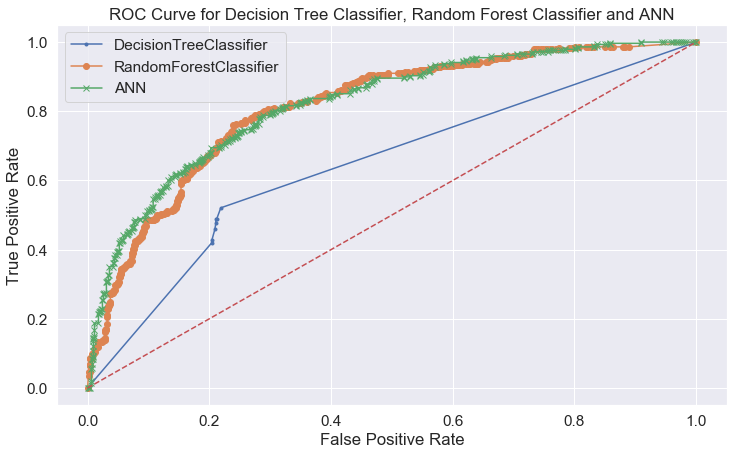

In [378]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

Dcart_test_auc=roc_auc_score(y_test,dtc.predict_proba(x_test)[:,1])
print('AUC for DT Test Model is',Dcart_test_auc)
Drf_test_auc=roc_auc_score(y_test,rfc.predict_proba(x_test)[:,1])
print('AUC for RF Test Model is',Drf_test_auc)
Dnn_test_auc=roc_auc_score(y_test,mlp.predict_proba(x_test)[:,1])
print('AUC for ANN Test Model is',Dnn_test_auc)

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, mlp.predict_proba(x_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Decision Tree Classifier, Random Forest Classifier and ANN'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

### Comparing GridSearchCV Models on The test set

In [379]:
models=[dtc1,rfc1,mlp1]
models_names={dtc1:'DecisionTreeClassifier',rfc1:'RandomForestClassifier',mlp1:'ANN'}

Accuracy for DT Test model is 
 0.7922222222222223
Accuracy for RF Test model is 
 0.8022222222222222
Accuracy for ANN Test model is  
 0.7744444444444445
Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       612
           1       0.70      0.62      0.66       288

    accuracy                           0.79       900
   macro avg       0.76      0.75      0.75       900
weighted avg       0.79      0.79      0.79       900



Confusion Matrix for DecisionTreeClassifier model is 
 [[535  77]
 [110 178]]


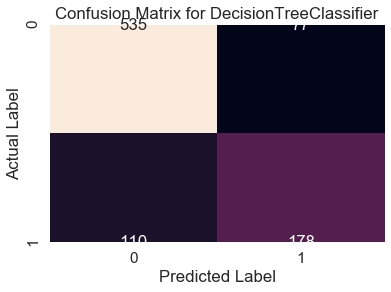

Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       612
           1       0.74      0.57      0.64       288

    accuracy                           0.80       900
   macro avg       0.78      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



Confusion Matrix for RandomForestClassifier model is 
 [[554  58]
 [125 163]]


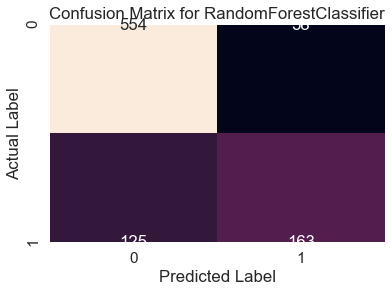

Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       612
           1       0.73      0.47      0.57       288

    accuracy                           0.78       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.77      0.78      0.76       900



Confusion Matrix for ANN model is 
 [[563  49]
 [153 135]]


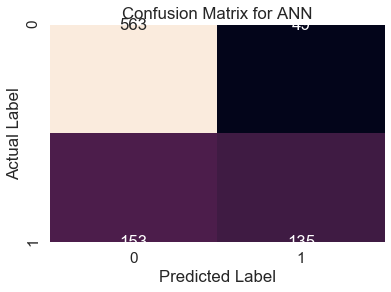

In [380]:
#CART Test Data Accuracy
cart_test_acc=accuracy_score(y_test,test_prediction_dtc1)
print('Accuracy for DT Test model is','\n',cart_test_acc)

#RF Test Data Accuracy
rf_test_acc=accuracy_score(y_test,test_prediction_rfc1)
print('Accuracy for RF Test model is','\n',rf_test_acc)

#ANN Test Data Accuracy
nn_test_acc=accuracy_score(y_test,test_prediction_mlp1)
print('Accuracy for ANN Test model is ','\n',nn_test_acc)


for i in models:
    i.fit(x_train,y_train)
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(x_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]),'\n',confusion_matrix(y_test,i.predict(x_test)))
           
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

- Precision: means the percentage of your results which are relevant.

- Recall: refers to the percentage of total relevant results correctly classified by your algorithm

- True Positive (TP) refers to the number of people who have actually claimed and are classified/predicted as claimed.

- False Negative (FN) refers to the number of people who have actually claimed and are classified/predicted as unclaimed. 

- On the other hand, False Positive (FP) refers to the number of people who have actually unclaimed and are classified/predicted as claimed.

- True Negative (TN) refers to the number of people who have actually unclaimed and are classified/predicted as unclaimed. 

- All results of the different metrics are then averaged to return the final result.

In [381]:
#Code for getting precision,recall,F1 score of test dataset in separate variable

cart_metrics=classification_report(y_test,test_prediction_dtc1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)

rf_metrics=classification_report(y_test,test_prediction_rfc1,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)

nn_metrics=classification_report(y_test,test_prediction_mlp1,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)


### Compare ROC curves and Calculate AUC for all GridSearchCV models on the test data

AUC for DT Test Model is 0.8243237109658679
AUC for RF Test Model is 0.8448790395787945
AUC for ANN Test Model is 0.8290185866013072


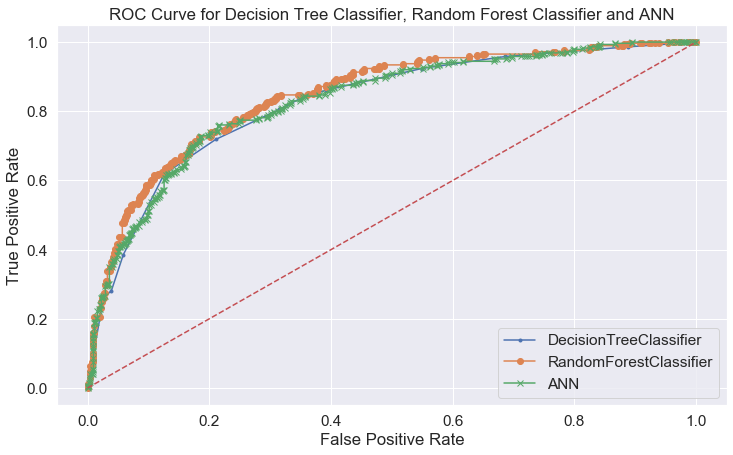

In [382]:
models_names={dtc1:'DecisionTreeClassifier',rfc1:'RandomForestClassifier',mlp1:'ANN'}

cart_test_auc=roc_auc_score(y_test,dtc1.predict_proba(x_test)[:,1])
print('AUC for DT Test Model is',cart_test_auc)
rf_test_auc=roc_auc_score(y_test,rfc1.predict_proba(x_test)[:,1])
print('AUC for RF Test Model is',rf_test_auc)
nn_test_auc=roc_auc_score(y_test,mlp1.predict_proba(x_test)[:,1])
print('AUC for ANN Test Model is',nn_test_auc)

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dtc1.predict_proba(x_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc1.predict_proba(x_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, mlp1.predict_proba(x_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Decision Tree Classifier, Random Forest Classifier and ANN'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

#### Inference:

- AUC for DT Test Model is 82.43%
- AUC for RF Test Model is 84.48%
- AUC for ANN Test Model is 82.90%

-- Random Forest model is better than the Decision Tree and ANN Since it has greater AUC on test dataset. It has higher Positive Rates even in lower threshold values. 


### 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

### Comparison of the performance metrics from the 3 models

In [383]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'D_CART Train':[Dcart_train_acc,Dcart_train_auc,Dcart_train_recall,Dcart_train_precision,Dcart_train_f1],
        'D_CART Test':[Dcart_test_acc,Dcart_test_auc,Dcart_test_recall,Dcart_test_precision,Dcart_test_f1],
        'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'D_RF Train':[Drf_train_acc,Drf_train_auc,Drf_train_recall,Drf_train_precision,Drf_train_f1],
        'D_RF Test':[Drf_test_acc,Drf_test_auc,Drf_test_recall,Drf_test_precision,Drf_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'D_NN Train':[Dnn_train_acc,Dnn_train_auc,Dnn_train_recall,Dnn_train_precision,Dnn_train_f1],
        'D_NN Test':[Dnn_test_acc,Dnn_test_auc,Dnn_test_recall,Dnn_test_precision,Dnn_test_f1],
        'NN Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'NN Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,D_CART Train,D_CART Test,CART Train,CART Test,D_RF Train,D_RF Test,RF Train,RF Test,D_NN Train,D_NN Test,NN Train,NN Test
Accuracy,0.98,0.69,0.78,0.79,0.97,0.76,0.80,0.80,0.77,0.78,0.78,0.77
AUC,1.00,0.64,0.82,0.82,0.99,0.81,0.85,0.84,0.80,0.82,0.82,0.83
Recall,0.97,0.49,0.62,0.62,0.95,0.50,0.58,0.57,0.47,0.44,0.51,0.49
Precision,0.97,0.52,0.65,0.70,0.96,0.65,0.70,0.75,0.68,0.78,0.67,0.71
F1 Score,0.97,0.50,0.63,0.66,0.96,0.57,0.64,0.65,0.55,0.56,0.58,0.58


#### Inference:

-- Default Models: (D_Cart,D_RF and D_NN models)

- Area under the curve of RF on the training data is 99%, which indicates very high performance that all classes have been correctly classified. Whereas on the test data model performance is with AUC 81%, which is almost 19% less than the performance of the training data.

- Since we are building a model to predict if a person will claim the insurance or not, for practical purposes, we will be more interested in correctly classifying 1 (Claimed) than 0(Unclaimed).

- If a person unclaimed, is incorrectly predicted to be claimed, in this situation, the cost is more severe, than when we incorrectly predict a person, who actually claims, as unclaimed.

- From the Random Forest model, looking at the Accuracy, Sensitivity/Recall, Specificity, Precision and AUC, we have almost 99% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1. This is because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

- From the CART model, Area under the curve of CART on the training data is 100%, looking at the Accuracy, Sensitivity/Recall, Specificity, Precision and AUC, we have almost 97% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1. This is also because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

- From the NN model, Area under the curve of NN on the training data is 80%, looking at the Accuracy, Sensitivity/Recall, Specificity, Precision and AUC, we have almost 80% results on the training data as well as the test data. Therefore the NN model is better as compared to the other default models.


-- GridSearchCV: (Cart, RF and NN models)

- In these models, we have hard-coded the hyper parameter values(eg. n_estimators for Random Forest and increasing the layers in the ANN) to make better predictions. We can optimize/fine-tune the random forest model, by trying different values for the hyper parameters to see if the model performance is improving.

- Random forest will reduce variance part of error rather than bias part, so on a given training data set decision tree may be more accurate than a random forest or ANN. But on an unexpected validation data set, Random forest and ANN always wins in terms of accuracy. For our RF model, we have got 0.803 which means our model is approx. 80% accurate.

- Accuracy for Decision Tree Classifier model is 79.22%
- Accuracy for Random Forest Classifier model is 80.22%
- Accuracy for ANN model is 77.44%


### 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

#### Inference:

Overall, RF performed marginally better than Decision Tree and Neural Network with area under the curve (AUC) of 84.25% (82.43% and 82.90%) respectively.


#### CART - Decision Trees
- Over-fitting can occur with a flexible model like decision trees where the model which memorize the training data and learn any noise in the data as well. This will make it unable to predict the test data.


#### Random Forests
- RF performs internal cross-validation (i.e. using out-of-bag samples) and only has a few tuning parameters. 
- The fundamental reason to use a random forest instead of a decision tree is to combine the predictions of many decision trees into a single model. The logic is that a single even made up of many mediocre models will still be better than one good model. Random forests are less prone to overfitting because of this.
- Random Forest is less computationally expensive and does not require a GPU to finish training. A random forest can give you a different interpretation of a decision tree but with better performance.


#### Artificial Neural Network:

- They keep learning until it comes out with the best set of features to obtain a satisfying predictive performance.
- If all we cared about was the prediction, a neural network would be the the best algorithm used all the time. But in an industry setting, we need a model that can give meaning to a feature/variable to stakeholders. And these stakeholders will likely be anyone other than someone with a knowledge of deep learning or machine learning.


### The End